In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
bus = pd.read_csv("../output/bus_MQ.csv",index_col=False)
bus.head()

,Time (s),ID,Route,Next Stop,Current Stop,Direction,Total Distance (Km),Total Energy (KWh),SOC,At Stop,Previous Direction
0,0,133,M20,8 AV/W 41 ST,Michael J. Quill Depot (MQ),LINCOLN CENTER 66 ST via 8 AV,0.0,0.0,0.9,True,LINCOLN CENTER 66 ST via 8 AV
1,0,134,M20,8 AV/W 41 ST,Michael J. Quill Depot (MQ),LINCOLN CENTER 66 ST via 8 AV,0.0,0.0,0.9,True,LINCOLN CENTER 66 ST via 8 AV
2,0,135,M20,8 AV/W 41 ST,Michael J. Quill Depot (MQ),LINCOLN CENTER 66 ST via 8 AV,0.0,0.0,0.9,True,LINCOLN CENTER 66 ST via 8 AV
3,0,136,M20,8 AV/W 41 ST,Michael J. Quill Depot (MQ),LINCOLN CENTER 66 ST via 8 AV,0.0,0.0,0.9,True,LINCOLN CENTER 66 ST via 8 AV
4,0,137,M20,8 AV/W 41 ST,Michael J. Quill Depot (MQ),LINCOLN CENTER 66 ST via 8 AV,0.0,0.0,0.9,True,LINCOLN CENTER 66 ST via 8 AV


In [8]:
charger_rate = pd.read_csv("../output/charger_rate_MQ.csv",index_col = False)
charger_rate = charger_rate.set_index("Time (s)")
charger_rate.head()

,Charger 1,Charger 2,Charger 3,Charger 4,Charger 5,Charger 6,Charger 7,Charger 8,Charger 9,Charger 10,Charger 11,Charger 12,Charger 13,Charger 14,Charger 15,Charger 16,Charger 17,Charger 18,Charger 19,Charger 20
Time (s),,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0


In [9]:
charger_rate["Total"] = charger_rate.sum(axis = 1)

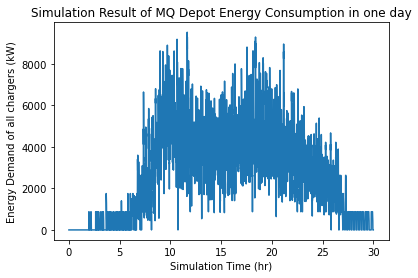

In [10]:
fig, ax = plt.subplots()
ax.plot(charger_rate.index/3600, charger_rate["Total"])
ax.set_xlabel("Simulation Time (hr)")
ax.set_ylabel("Energy Demand of all chargers (kW)")
ax.set_title("Simulation Result of MQ Depot Energy Consumption in one day")
ax.figure.savefig("../fig/Energy_Consumption.png", dpi = 200)

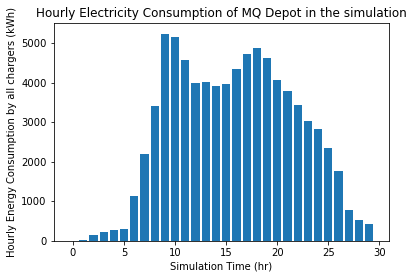

In [11]:
charger_rate["Hour"] = charger_rate.index // 3600
hourly_consumption = charger_rate.groupby("Hour").mean()

fig, ax = plt.subplots()
ax.bar(hourly_consumption.index, hourly_consumption["Total"])
ax.set_xlabel("Simulation Time (hr)")
ax.set_ylabel("Hourly Energy Consumption by all chargers (kWh)")
ax.set_title("Hourly Electricity Consumption of MQ Depot in the simulation")
ax.figure.savefig("../fig/Hourly_Consumption.png", dpi = 200)

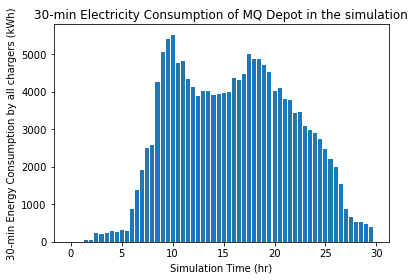

In [12]:
charger_rate["Half_Hour"] = charger_rate.index // 1800 / 2
half_hourly_consumption = charger_rate.groupby("Half_Hour").mean()
half_hourly_consumption.to_csv("../output/MQ_halfhour_consumption.csv")

fig, ax = plt.subplots()
ax.bar(half_hourly_consumption.index, half_hourly_consumption["Total"], width = 0.4)
ax.set_xlabel("Simulation Time (hr)")
ax.set_ylabel("30-min Energy Consumption by all chargers (kWh)")
ax.set_title("30-min Electricity Consumption of MQ Depot in the simulation")
ax.figure.savefig("../fig/MQ_Half_Hourly_Consumption.png", dpi = 200)

In [13]:
hourly_consumption["Total"].sum()

80099.99894548063

In [8]:
Bus_id_1 = bus[bus["ID"] == 1]

In [9]:
Bus_id_1.to_csv("../output/Bus_id_1.csv")

In [2]:
bus = pd.read_csv("../output/bus_CH.csv",index_col=False)
charger_rate = pd.read_csv("../output/charger_rate_CH.csv",index_col = False)
charger_rate = charger_rate.set_index("Time (s)")
charger_rate["Total"] = charger_rate.sum(axis = 1)

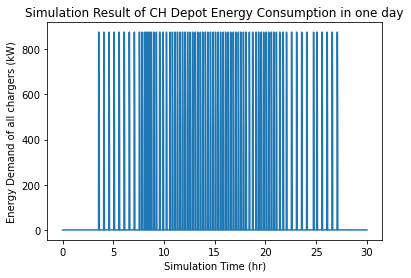

In [3]:
fig, ax = plt.subplots()
ax.plot(charger_rate.index/3600, charger_rate["Total"])
ax.set_xlabel("Simulation Time (hr)")
ax.set_ylabel("Energy Demand of all chargers (kW)")
ax.set_title("Simulation Result of CH Depot Energy Consumption in one day")
ax.figure.savefig("../fig/Energy_Consumption_CH.png", dpi = 200)

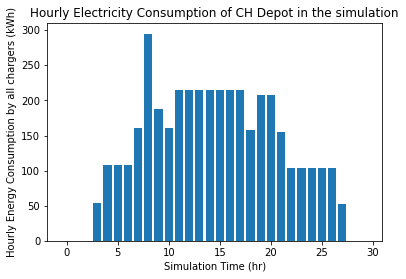

In [6]:
charger_rate["Hour"] = charger_rate.index // 3600
hourly_consumption = charger_rate.groupby("Hour").mean()

fig, ax = plt.subplots()
ax.bar(hourly_consumption.index, hourly_consumption["Total"])
ax.set_xlabel("Simulation Time (hr)")
ax.set_ylabel("Hourly Energy Consumption by all chargers (kWh)")
ax.set_title("Hourly Electricity Consumption of CH Depot in the simulation")
ax.figure.savefig("../fig/Hourly_Consumption_CH.png", dpi = 200)

In [7]:
hourly_consumption["Total"].sum()

3981.225243984333

## KB

In [2]:
bus = pd.read_csv("../output/bus_KB.csv",index_col=False)
charger_rate = pd.read_csv("../output/charger_rate_KB.csv",index_col = False)
charger_rate = charger_rate.set_index("Time (s)")
charger_rate["Total"] = charger_rate.sum(axis = 1)

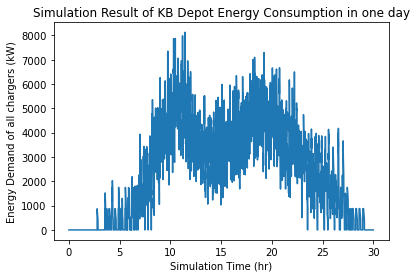

In [3]:
fig, ax = plt.subplots()
ax.plot(charger_rate.index/3600, charger_rate["Total"])
ax.set_xlabel("Simulation Time (hr)")
ax.set_ylabel("Energy Demand of all chargers (kW)")
ax.set_title("Simulation Result of KB Depot Energy Consumption in one day")
ax.figure.savefig("../fig/Energy_Consumption_KB.png", dpi = 200)

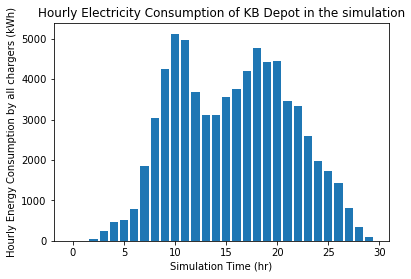

In [4]:
charger_rate["Hour"] = charger_rate.index // 3600
hourly_consumption = charger_rate.groupby("Hour").mean()

fig, ax = plt.subplots()
ax.bar(hourly_consumption.index, hourly_consumption["Total"])
ax.set_xlabel("Simulation Time (hr)")
ax.set_ylabel("Hourly Energy Consumption by all chargers (kWh)")
ax.set_title("Hourly Electricity Consumption of KB Depot in the simulation")
ax.figure.savefig("../fig/Hourly_Consumption_KB.png", dpi = 200)

In [5]:
hourly_consumption["Total"].sum()

72192.38382927484

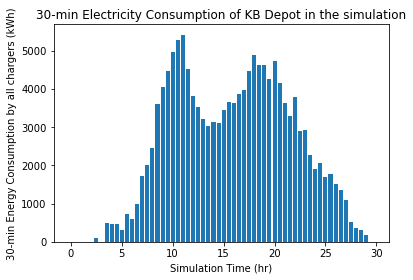

In [6]:
charger_rate["Half_Hour"] = charger_rate.index // 1800 / 2
half_hourly_consumption = charger_rate.groupby("Half_Hour").mean()
half_hourly_consumption.to_csv("../output/KB_halfhour_consumption.csv")

fig, ax = plt.subplots()
ax.bar(half_hourly_consumption.index, half_hourly_consumption["Total"], width = 0.4)
ax.set_xlabel("Simulation Time (hr)")
ax.set_ylabel("30-min Energy Consumption by all chargers (kWh)")
ax.set_title("30-min Electricity Consumption of KB Depot in the simulation")
ax.figure.savefig("../fig/KB_Half_Hourly_Consumption.png", dpi = 200)